**Importing Libraries**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset:

In [27]:
# Load the dataset
from google.colab import files
files.upload()
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (3).csv


printing top 10 records:

In [28]:
print(data.head(10))

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60    

**Data Pre-processing: Handling missing values and categorical variables**

In [29]:
print(data['Sleep Disorder'].unique())

[nan 'Sleep Apnea' 'Insomnia']


In [30]:
# Drop any rows with missing values
data.dropna(inplace=True)

print(data['Sleep Disorder'].unique())

['Sleep Apnea' 'Insomnia']


In [31]:
# Encode 'Sleep Disorder' column
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

In [32]:
# One-hot encode other categorical variables
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [33]:
# Display columns after encoding
print(data.columns)

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Gender_Male', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight',
       'Blood Pressure_120/80', 'Blood Pressure_125/80',
       'Blood Pressure_129/84', 'Blood Pressure_130/85',
       'Blood Pressure_130/86', 'Blood Pressure_131/86',
       'Blood Pressure_132/87', 'Blood Pressure_135/88',
       'Blood Pressure_135/90', 'Blood Pressure_139/91',
       'Blood Pressure_140/90', 'Blood Pressure_140/95',
       'Blood Pressure_142/92'],
      dtype='object')


In [34]:
# Define features and target variables
# We will predict the presence of both sleep disorders
y = data['Sleep Disorder']
X = data.drop(columns=['Sleep Disorder', 'Person ID'])  # Drop 'Person ID' as it's not a feature

**Data Modelling using Logistic Regression and Decision Tree Data Analytic
techniques**

In [35]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate the Logistic Regression model
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8387096774193549
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [36]:
# Train a Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict and evaluate the Decision Tree Classifier
y_pred_dtc = dtc.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dtc))

Decision Tree Accuracy: 0.8709677419354839
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



**Data Visualization: plotting of data**

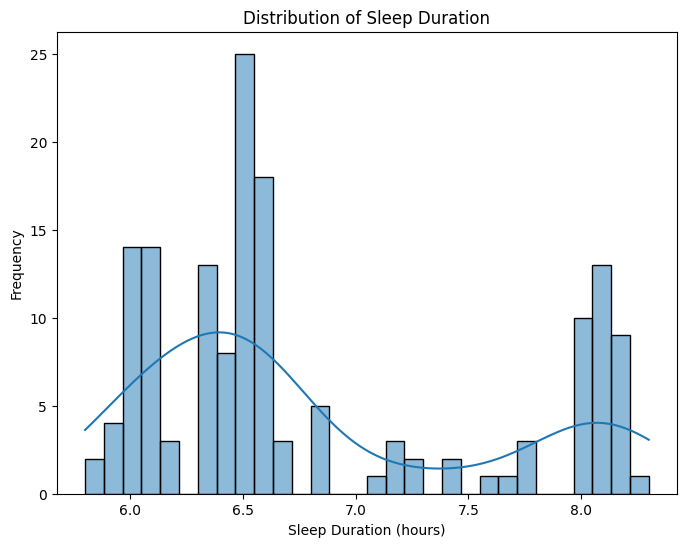

In [37]:
# Visualizations

# Distribution of sleep duration
plt.figure(figsize=(8, 6))
sns.histplot(data['Sleep Duration'], kde=True, bins=30)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()


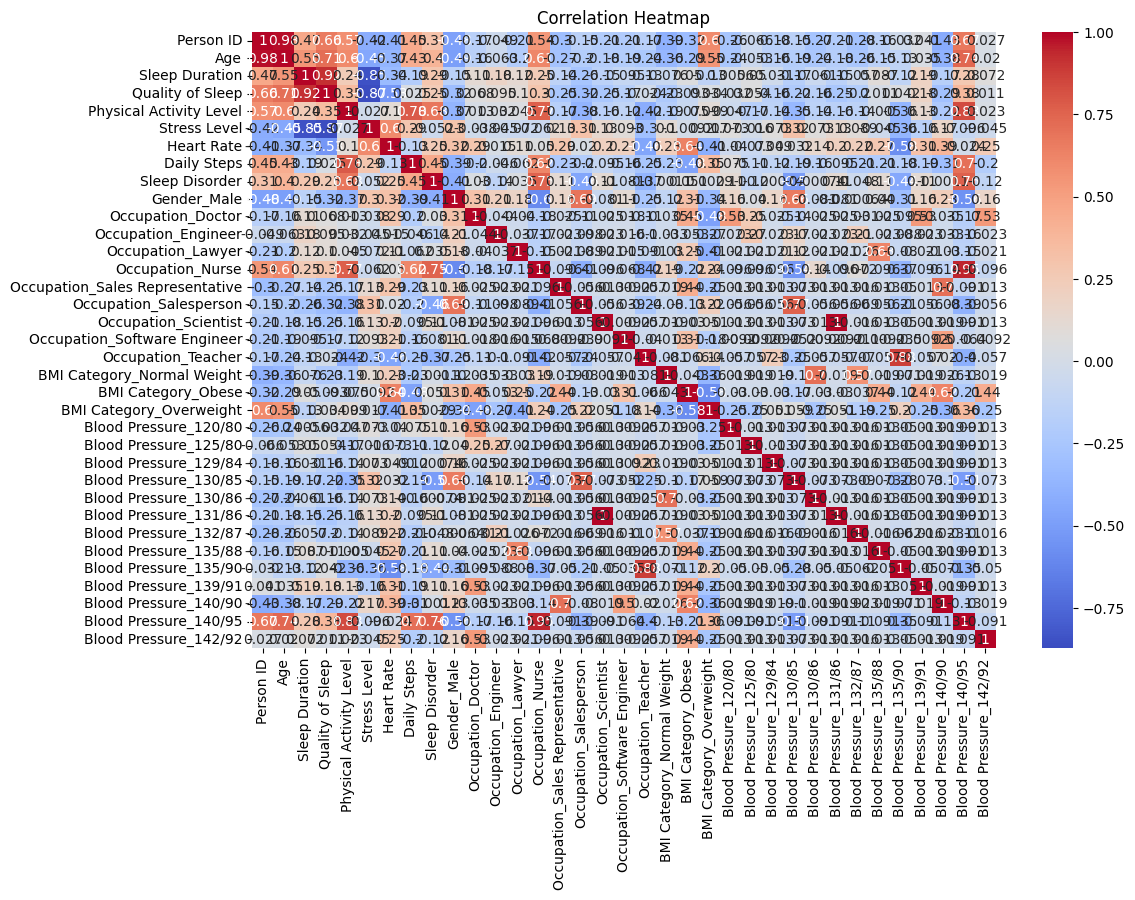

In [38]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

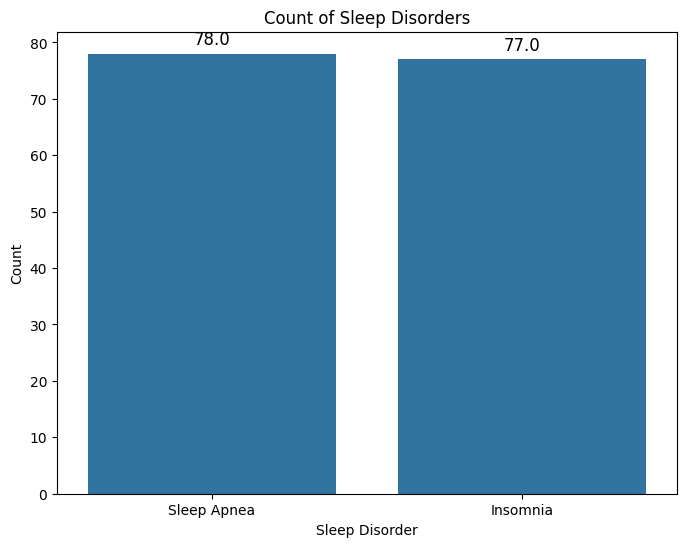

In [45]:
# Count of sleep disorders

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sleep Disorder', data=data)
plt.title('Count of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')

# Annotate the counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()